In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [5]:
egitim = pd.read_csv('train.csv')
egitim.head()
egitim.shape

(1460, 81)

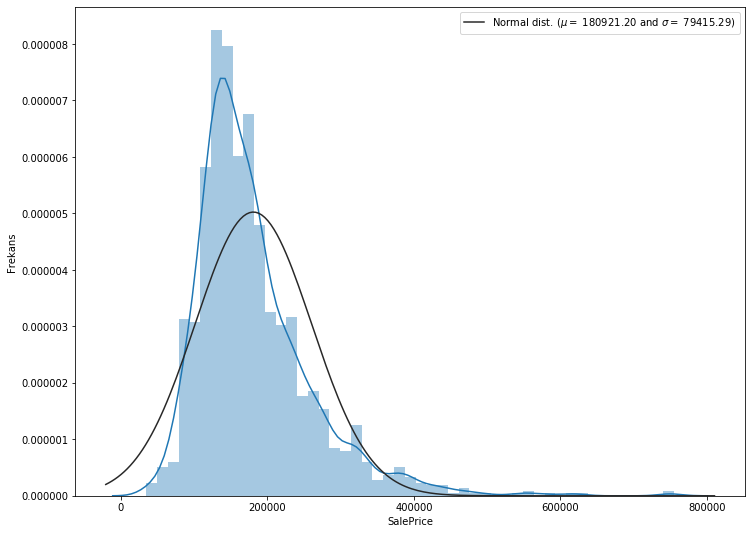

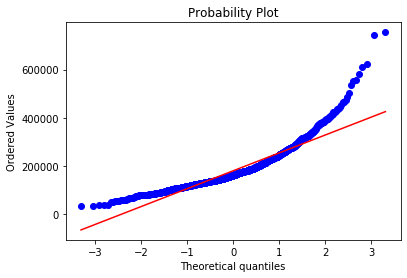

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(egitim['SalePrice'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(egitim['SalePrice'])

#Dağılımı çizdirme
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frekans')

#Olasılık durumu çizdirme
fig = plt.figure()
stats.probplot(egitim['SalePrice'], plot = plt)
plt.show()

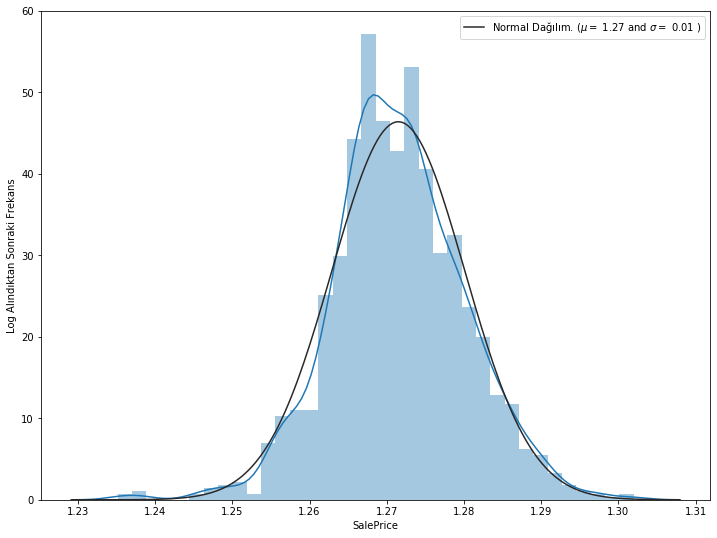

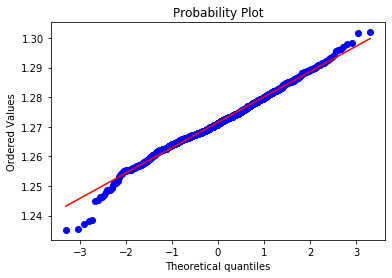

In [9]:
#Dağılımın normale daha yakın forma dönüşmesi için logaritmik dönüşüm;
egitim['SalePrice'] = np.log1p(egitim['SalePrice'])

#Normal dağılım
plt.subplots(figsize = (12,9))
sns.distplot(egitim['SalePrice'], fit=stats.norm)

(mu, sigma) = stats.norm.fit(egitim['SalePrice'])

#Dağılımı görselleştirme
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Alındıktan Sonraki Frekans')

#Olasılık durumu
fig = plt.figure()
stats.probplot(egitim['SalePrice'], plot=plt)
plt.show()

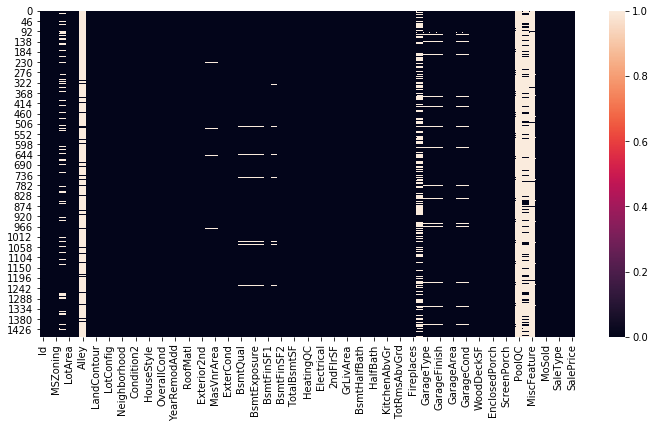

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
#Eksik veriler
egitim.columns[egitim.isnull().any()]

#Eksik verilerin grafiği
plt.figure(figsize=(12,6))
sns.heatmap(egitim.isnull())
plt.show()

#Her sütundaki eksik veriler
Isnull = egitim.isnull().sum()/len(egitim)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace = True, ascending= False)
Isnull

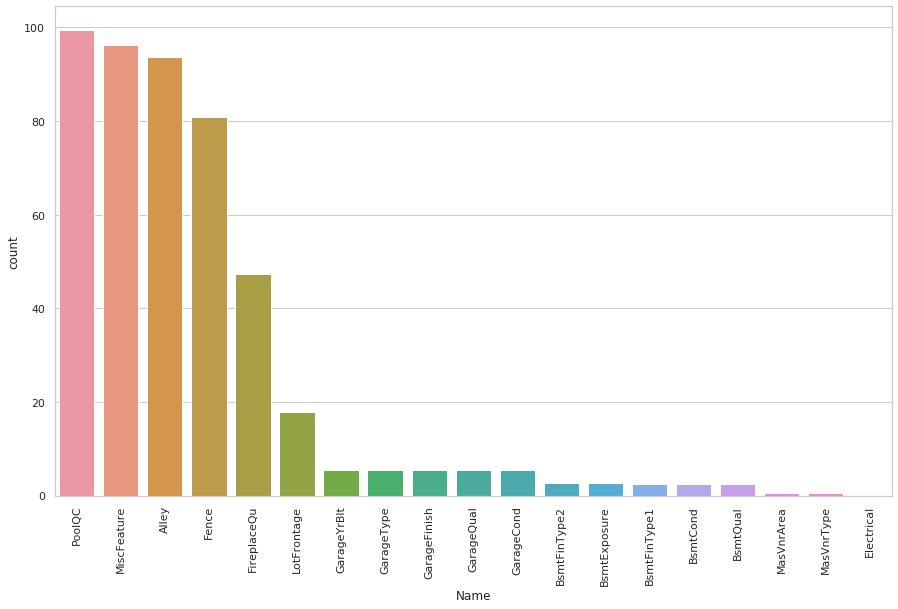

In [13]:
#Eksik verilerin görselleştirilmesi
Isnull = Isnull.to_frame()

#Her sütundaki değerlerin sayısı
Isnull.columns=['count']
Isnull.index.names=['İsimler']
Isnull['Name']=Isnull.index

#Görselleştirme
plt.figure(figsize=(15,9))
sns.set(style = 'whitegrid')
sns.barplot(x='Name', y='count', data = Isnull)
plt.xticks(rotation=90)
plt.show()

In [0]:
#Eğitim verisi içinden yalnızca sayısal değerler alan sütunlar
egitim_corr = egitim.select_dtypes(include = [np.number])

egitim_corr.shape

#ID sütunu silinmesi
del egitim_corr['Id']

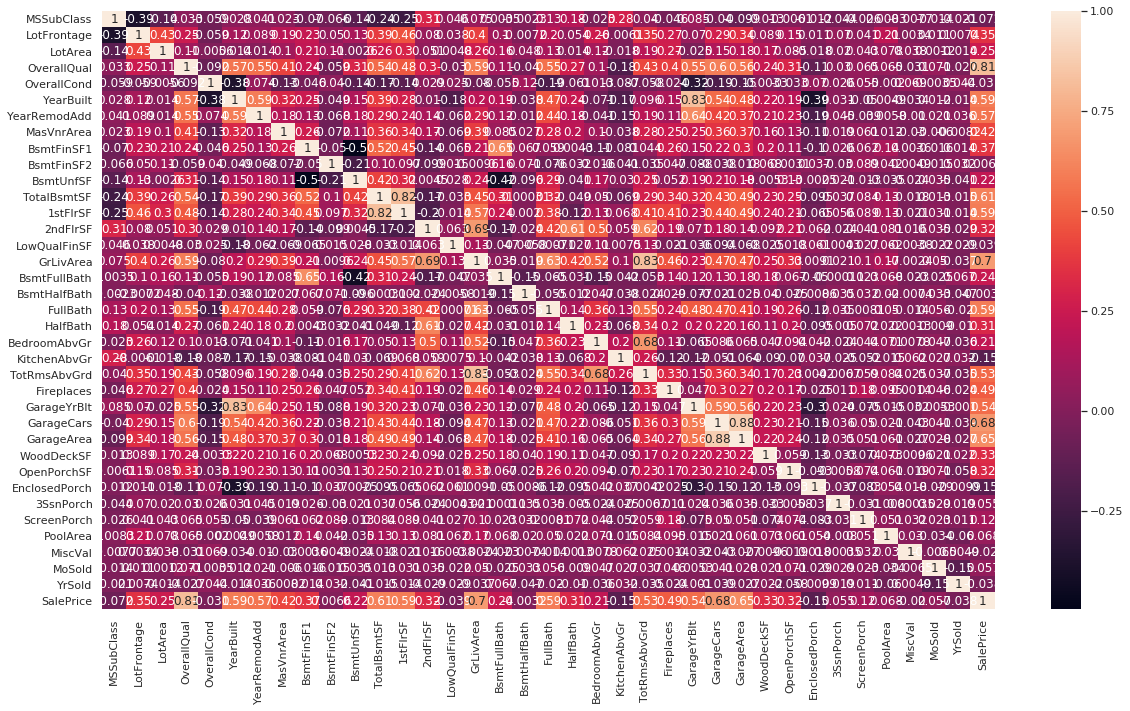

In [17]:
#Korelasyon grafiği
corr = egitim_corr.corr()
plt.subplots(figsize=(20,11))
sns.heatmap(corr, annot=True)

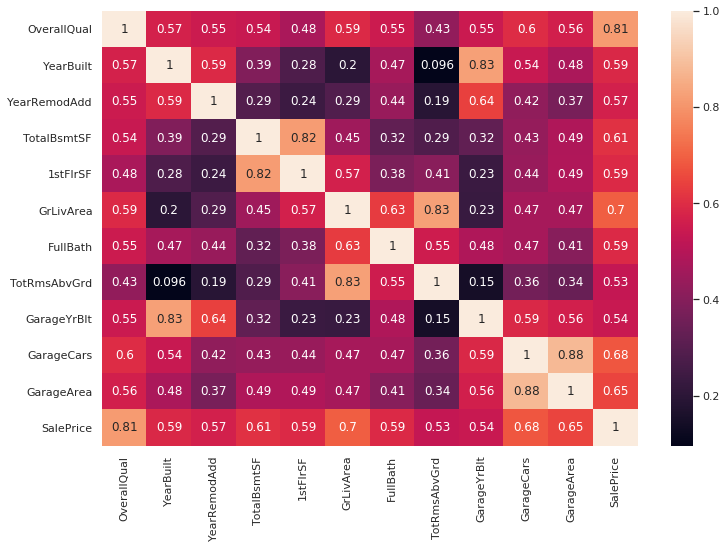

In [18]:
#En çok bilgi verenlerin seçilmesi
eniyi_50_deger = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize = (12,8))
eniyi_iliski = egitim[eniyi_50_deger].corr()
sns.heatmap(eniyi_iliski, annot=True)
plt.show()

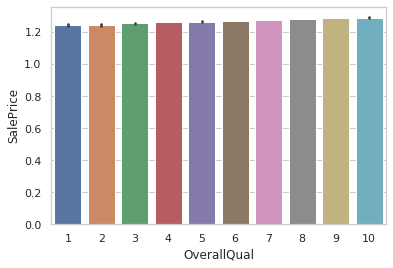

In [20]:
#OverallQual özellliğindeki benzersiz değerler
egitim.OverallQual.unique()

#Grafik ile gösterimi
sns.barplot(egitim.OverallQual, egitim.SalePrice)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


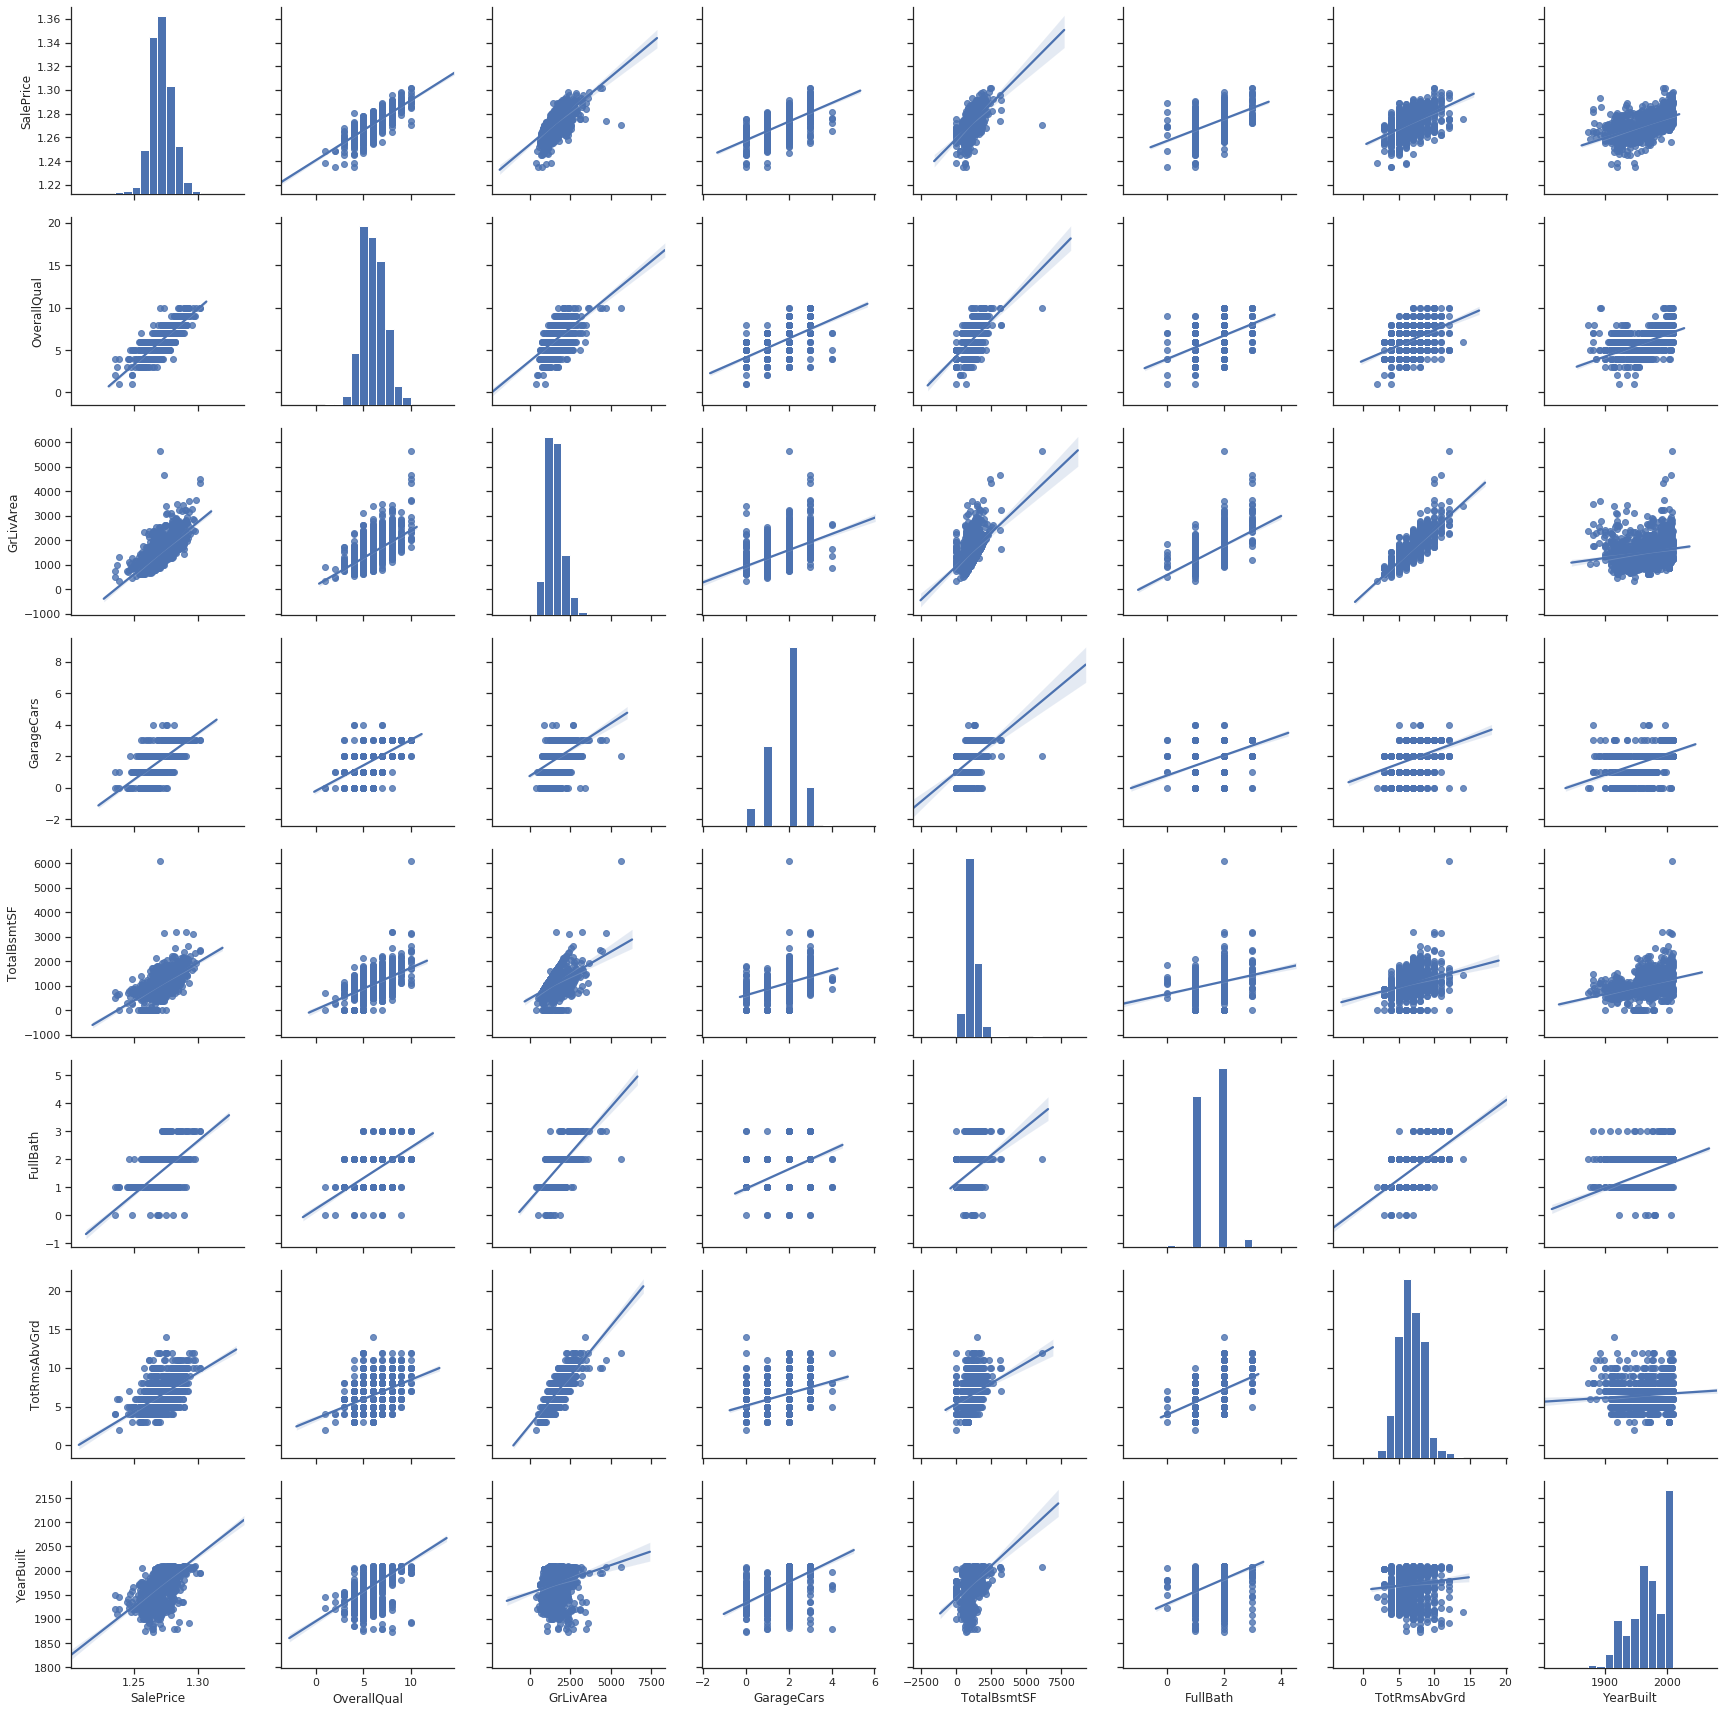

In [21]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(egitim[col], size=3, kind ='reg')

In [22]:
corr = egitim.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)

corr.SalePrice

SalePrice        1.000000
OverallQual      0.814276
GrLivArea        0.695805
GarageCars       0.679921
GarageArea       0.649144
TotalBsmtSF      0.608216
FullBath         0.593615
1stFlrSF         0.592491
YearBuilt        0.588223
YearRemodAdd     0.567048
GarageYrBlt      0.542977
TotRmsAbvGrd     0.531271
Fireplaces       0.488114
MasVnrArea       0.423820
BsmtFinSF1       0.368869
LotFrontage      0.353819
WoodDeckSF       0.332759
OpenPorchSF      0.318060
2ndFlrSF         0.317181
HalfBath         0.314768
LotArea          0.254799
BsmtFullBath     0.235507
BsmtUnfSF        0.220688
BedroomAbvGr     0.212503
ScreenPorch      0.121505
PoolArea         0.068063
MoSold           0.057424
3SsnPorch        0.055434
BsmtFinSF2       0.006648
BsmtHalfBath    -0.003184
Id              -0.017136
MiscVal         -0.019917
OverallCond     -0.030861
YrSold          -0.038074
LowQualFinSF    -0.038592
MSSubClass      -0.072020
KitchenAbvGr    -0.147098
EnclosedPorch   -0.150062
Name: SalePr

In [0]:
#Boş değerlerin None olarak doldurulması
egitim['PoolQC'] = egitim['PoolQC'].fillna('None')

#%50 civarı eksik veri içerenlerin None ile doldurulması
egitim['MiscFeature'] = egitim['MiscFeature'].fillna('None')
egitim['Alley'] = egitim['Alley'].fillna('None')
egitim['Fence'] = egitim['Fence'].fillna('None')
egitim['FireplaceQu'] = egitim['FireplaceQu'].fillna('None')

In [0]:
#Mahalleye göre gruplanması ve eksik değerlerin medyan FotFrontage ile doldurulması
egitim['LotFrontage'] = egitim.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

#Garage sütunlarının None ile değiştirilmesi (?)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  egitim[col] = egitim[col].fillna('None')

#Diğer garage sütunlarının 0 ile değiştirilmesi (?)
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
  egitim[col] = egitim[col].fillna(int(0))

#Bsmt sütunlarının None ile değiştirilmesi (?)
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    egitim[col] = egitim[col].fillna('None')

#ManVnrArea'nın sıfır ile değiştirilmesi
egitim['MasVnrArea'] = egitim['MasVnrArea'].fillna(int(0))

#MansVnrType'ın None ile değiştirilmesi
egitim['MasVnrType'] = egitim['MasVnrType'].fillna('None')

#Mode değerlerinin eklenmesi
egitim['Electrical'] = egitim['Electrical'].fillna(egitim['Electrical']).mode()[0]

#Utilities sütununa ihtiyaç yok
egitim = egitim.drop(['Utilities'], axis=1)


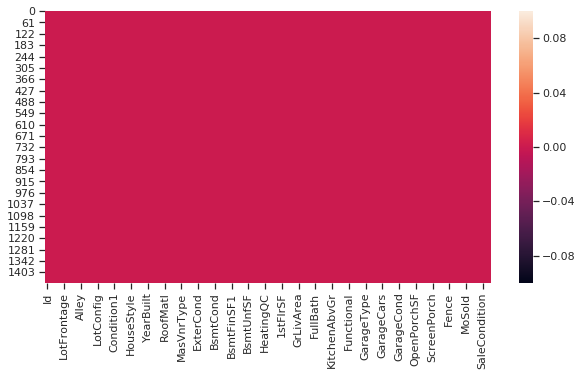

In [25]:
#Verisetinin güncel grafiği/Null değeren içeren sütun kalmadı
plt.figure(figsize=(10,5))
sns.heatmap(egitim.isnull())

In [0]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')
#(?)

from sklearn.preprocessing import LabelEncoder
for c in cols:
  lbl = LabelEncoder()
  lbl.fit(list(egitim[c].values))
  egitim[c] = lbl.transform(list(egitim[c].values))

#Hedef değişken olan SalePrice'ın tahmin için y değişkenine atanması
y = egitim['SalePrice']

#Tahmin edileceği için hedef değişken silinir
del egitim['SalePrice']

X = egitim.values
y = y.values



In [30]:
#Verilerin eğitim ve test için bölünmesi
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#Linear Regression
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

#Tahmin
print("Tahmin edilen değer: " + str(model.predict([X_test[142]])))
print("Gerçek değer: " + str(y_test[142]))

#Doğruluk ölçümü
print("Doğruluk oranı: ", model.score(X_test, y_test)*100)

Tahmin edilen değer: [1.2626153]
Gerçek değer: 1.2660678994451433
Doğruluk oranı:  88.68115661133875


In [31]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000)
model.fit(X_train, y_train)

#Tahmin
print("Tahmin edilen değer: " + str(model.predict([X_test[142]])))
print("Gerçek değer: " + str(y_test[142]))

#Doğruluk ölçümü
print("Doğruluk oranı: ", model.score(X_test, y_test)*100)

Tahmin edilen değer: [1.26468792]
Gerçek değer: 1.2660678994451433
Doğruluk oranı:  89.14575752629248


In [33]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators = 100, max_depth = 4)
GBR.fit(X_train, y_train)

#Tahmin
print("Tahmin edilen değer: " + str(model.predict([X_test[142]])))
print("Gerçek değer: " + str(y_test[142]))

#Doğruluk ölçümü
print("Doğruluk oranı: ", model.score(X_test, y_test)*100)

Tahmin edilen değer: [1.26468792]
Gerçek değer: 1.2660678994451433
Doğruluk oranı:  89.14575752629248
